# House Price Prediction
# Rohit Tyagi

Linear Regression - MAE: 41.94, MSE: 10081.26, R2: 0.53
Random Forest Regression - MAE: 37.02, MSE: 9586.85, R2: 0.55


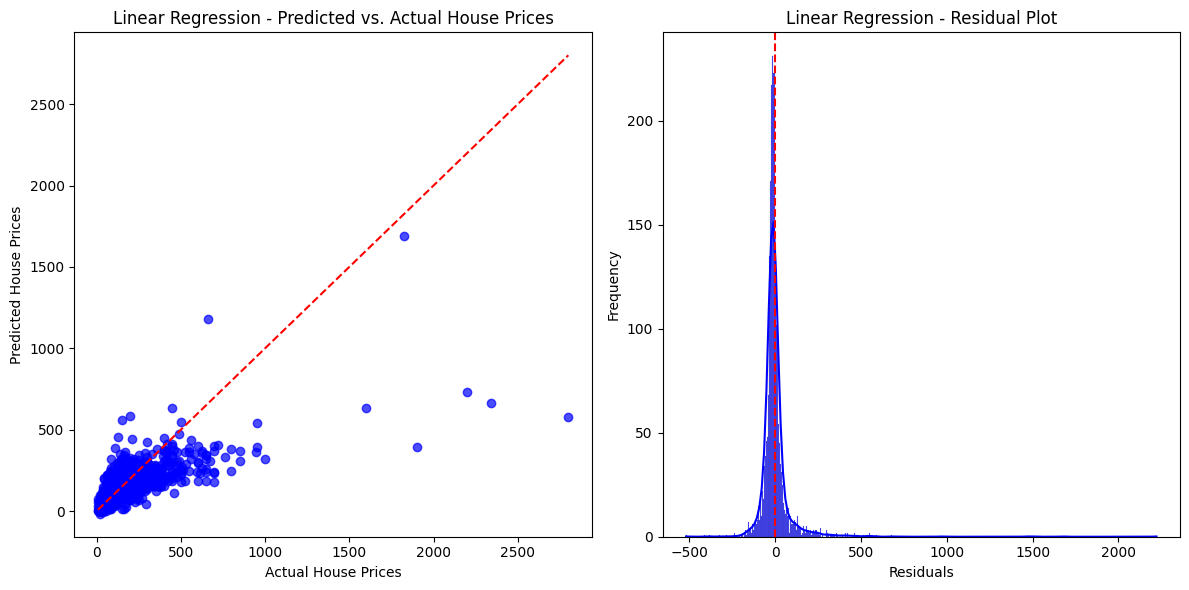

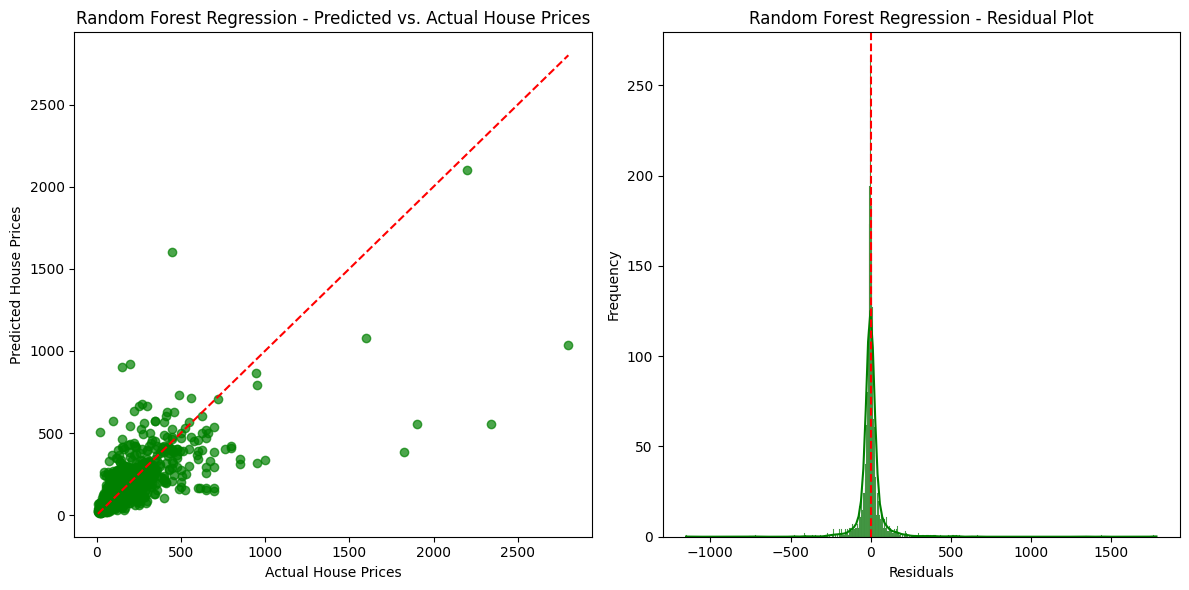

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def main():
    data = pd.read_csv('/content/BHP.csv')

    data.fillna(0, inplace=True)
    data['total_sqft'] = data['total_sqft'].str.extract('(\d+)').astype(float)
    data.dropna(subset=['total_sqft'], inplace=True)
    data = pd.get_dummies(data, columns=['area_type', 'availability'])

    selected_features = ['total_sqft', 'bath', 'balcony', 'area_type_Built-up  Area', 'area_type_Carpet  Area',
                         'area_type_Plot  Area', 'area_type_Super built-up  Area', 'availability_Immediate Possession',
                         'availability_Ready To Move']

    X = data[selected_features]
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return y_pred, mae, mse, r2

    linear_model = LinearRegression()
    y_pred_linear, mae_linear, mse_linear, r2_linear = train_and_evaluate_model(linear_model, X_train, y_train, X_test, y_test)
    print("Linear Regression - MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mae_linear, mse_linear, r2_linear))

    rf_model = RandomForestRegressor(random_state=42)
    y_pred_rf, mae_rf, mse_rf, r2_rf = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)
    print("Random Forest Regression - MAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mae_rf, mse_rf, r2_rf))

    def visualize_results(y_test, y_pred, model_name):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y_test, y_pred, color='blue' if model_name == 'Linear Regression' else 'green', alpha=0.7)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
        plt.xlabel('Actual House Prices')
        plt.ylabel('Predicted House Prices')
        plt.title(f'{model_name} - Predicted vs. Actual House Prices')

        plt.subplot(1, 2, 2)
        residuals = y_test - y_pred
        sns.histplot(residuals, kde=True, color='blue' if model_name == 'Linear Regression' else 'green', alpha=0.7)
        plt.axvline(x=0, color='red', linestyle='--')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title(f'{model_name} - Residual Plot')

        plt.tight_layout()
        plt.show()

    visualize_results(y_test, y_pred_linear, 'Linear Regression')
    visualize_results(y_test, y_pred_rf, 'Random Forest Regression')

if __name__ == "__main__":
    main()
